In [1]:
%load_ext autoreload
%autoreload 2

In [63]:
from __future__ import division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import seaborn as sns

import comptools as comp

color_dict = comp.get_color_dict()

sns.set_context(context='paper', font_scale=1.5)
# sns.set_context(context='paper', font_scale=1.75)

%matplotlib inline

In [3]:
config = 'IC86.2012'
num_groups = 2
comp_list = comp.get_comp_list(num_groups=num_groups)

In [4]:
df_sim = comp.load_sim(config=config,
                       energy_cut_key='MC_log_energy', 
                       energy_reco=False,
                       log_energy_min=None,
                       log_energy_max=None,
                       test_size=0,
                       verbose=True)

[                                        ] | 0% Completed |  0.1s

/home/jbourbeau/cr-composition/.virtualenv/lib/python2.7/site-packages/dask/base.py:835: UserWarning: The get= keyword has been deprecated. Please use the scheduler= keyword instead with the name of the desired scheduler like 'threads' or 'processes'
  warnings.warn("The get= keyword has been deprecated. "


[########################################] | 100% Completed |  8.0s
[########################################] | 100% Completed |  0.1s


In [5]:
energy_mask = df_sim['MC_log_energy'] >= 6.4

In [50]:
h, xedges, yedges = np.histogram2d(df_sim.loc[:, 'log_s125'].values,
                                   df_sim.loc[:, 'MC_log_energy'].values,
#                                    bins=[log_125_bins, log_MC_energy_bins])
                                   bins=(50, 50))

In [51]:
h = h / h.sum(axis=0)

In [52]:
h.sum(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [53]:
h = np.rot90(h)
h = np.flipud(h)
h = np.ma.masked_where(h == 0, h)

In [54]:
import matplotlib.colors as colors

In [55]:
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
extent

[-0.7863706656992693, 2.1775389075026235, 5.316134256754441, 7.999821416140386]

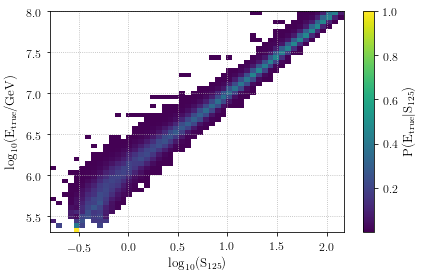

In [64]:
fig, ax = plt.subplots()
im = ax.imshow(h,
               extent=extent,
               origin='lower',
               interpolation='none',
               cmap='viridis',
               aspect='auto')
plt.colorbar(im, label='$\mathrm{P(E_{true} | S_{125})}$')

ax.set_ylabel('$\mathrm{\log_{10}(E_{true}/GeV)}$')
ax.set_xlabel('$\mathrm{\log_{10}(S_{125})}$')

ax.grid()

outfile = os.path.join(comp.paths.figures_dir, 'laputop_performance', 's125_vs_MC_energy.png')
comp.check_output_dir(outfile)
plt.savefig(outfile)

plt.show()

In [25]:
fig, ax = plt.subplots()
im = ax.imshow(h_norm, origin='lower',
#                extent=extent,
              )
ax.set_ylabel('$\mathrm{\log_{10}(E_{true}/GeV)}$')
ax.set_xlabel('$\mathrm{\log_{10}(S_{125})}$')
# plt.colorbar(im, label='$\mathrm{P(E_{true} | S_{125})}$')

plt.xticks(log_125_bins)

# outfile = os.path.join(comp.paths.figures_dir, 'laputop_performance', 's125_vs_MC_energy.png')
# comp.check_output_dir(outfile)
# plt.savefig(outfile)

plt.show()

KeyboardInterrupt: 

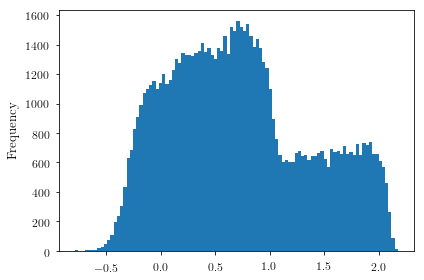

In [13]:
df_sim.log_s125.plot(kind='hist', bins=100)
plt.show()

In [20]:
log_125_bins = np.linspace(0, 2.5, 100)

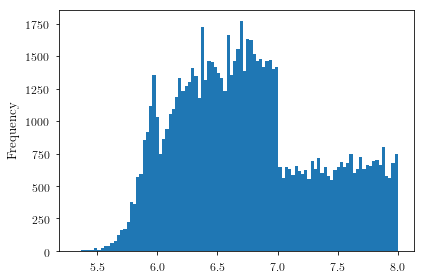

In [15]:
df_sim.MC_log_energy.plot(kind='hist', bins=100)
plt.show()

In [16]:
log_MC_energy_bins = np.linspace(6.4, 8.0, 100)

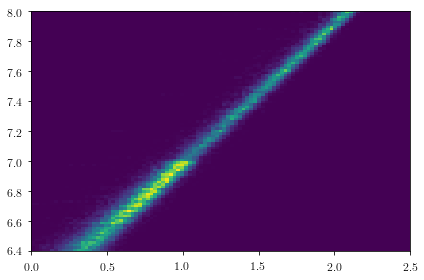

In [21]:
plt.hist2d(df_sim.loc[energy_mask, 'log_s125'].values,
           df_sim.loc[energy_mask, 'MC_log_energy'].values,
           bins=[log_125_bins, log_MC_energy_bins])
plt.show()